# Load and Train the desire testing dataset files.

In [1]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

data = pd.read_csv('https://ddosciu.s3.us-east-2.amazonaws.com/CSVs/UNB/Portmap.csv')

data.head(5)

/tmp/ipykernel_9049/1039767830.py:11: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://ddosciu.s3.us-east-2.amazonaws.com/CSVs/UNB/Portmap.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 09:18:16.964447,114456999,45,...,28337.112288,98168.0,3.0,9529897.25,351582.631269,10001143.0,9048097.0,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 09:18:18.506537,114347504,56,...,121314.911865,420255.0,4.0,9493929.75,351541.079539,9978130.0,8820294.0,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,2018-11-03 09:18:18.610576,36435473,6,...,0.000000,62416.0,62416.0,36373056.00,0.000000,36373056.0,36373056.0,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,2018-11-03 09:18:18.610579,36434705,6,...,0.000000,62413.0,62413.0,36372291.00,0.000000,36372291.0,36372291.0,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,2018-11-03 09:18:18.610581,36434626,6,...,0.000000,62409.0,62409.0,36372216.00,0.000000,36372216.0,36372216.0,0,0,BENIGN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191694 entries, 0 to 191693
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    191694 non-null  int64  
 1   Flow ID                       191694 non-null  object 
 2    Source IP                    191694 non-null  object 
 3    Source Port                  191694 non-null  int64  
 4    Destination IP               191694 non-null  object 
 5    Destination Port             191694 non-null  int64  
 6    Protocol                     191694 non-null  int64  
 7    Timestamp                    191694 non-null  object 
 8    Flow Duration                191694 non-null  int64  
 9    Total Fwd Packets            191694 non-null  int64  
 10   Total Backward Packets       191694 non-null  int64  
 11  Total Length of Fwd Packets   191694 non-null  float64
 12   Total Length of Bwd Packets  191694 non-nul

In [3]:
# Pre-process the data
# Encode categorical features (e.g., IP addresses)
encoder = LabelEncoder()
data[' Source IP'] = encoder.fit_transform(data[' Source IP'])
data[' Destination IP'] = encoder.fit_transform(data[' Destination IP'])
data[' Timestamp'] = pd.to_datetime(data[' Timestamp']).astype(np.int64)
data[' Label'] = encoder.fit_transform(data[' Label'])
data.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,90,0,124,0,0,1541236696964447000,114456999,45,...,28337.112288,98168.0,3.0,9529897.25,351582.631269,10001143.0,9048097.0,0,0,0
1,26,192.168.50.253-224.0.0.5-0-0-0,89,0,124,0,0,1541236698506537000,114347504,56,...,121314.911865,420255.0,4.0,9493929.75,351541.079539,9978130.0,8820294.0,0,0,0
2,176563,172.217.10.98-192.168.50.6-443-54799-6,92,54799,33,443,6,1541236698610576000,36435473,6,...,0.000000,62416.0,62416.0,36373056.00,0.000000,36373056.0,36373056.0,0,0,0
3,50762,172.217.7.2-192.168.50.6-443-54800-6,92,54800,76,443,6,1541236698610579000,36434705,6,...,0.000000,62413.0,62413.0,36372291.00,0.000000,36372291.0,36372291.0,0,0,0
4,87149,172.217.10.98-192.168.50.6-443-54801-6,92,54801,33,443,6,1541236698610581000,36434626,6,...,0.000000,62409.0,62409.0,36372216.00,0.000000,36372216.0,36372216.0,0,0,0


In [4]:
# Drop unnecessary columns in the CVs's
try:
  data = data.drop(['Unnamed: 0', 'Flow ID', 'SimillarHTTP'], axis=1)
except:
  print('Columns are dropped already')

In [5]:
# Set the desired number of majority class samples
num_majority_samples = 100000

# Get the minority class label
minority_class = data[' Label'].value_counts().idxmin()

# Separate majority and minority class samples
majority_samples = data[data[' Label'] != minority_class]
minority_samples = data[data[' Label'] == minority_class]

# Sample the majority class samples
majority_samples_sampled = majority_samples.sample(num_majority_samples, random_state=42)

# Combine the sampled majority class samples and minority class samples
balanced_data = pd.concat([majority_samples_sampled, minority_samples], axis=0)

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_data.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,17,648,97,63368,17,1541239298600818000,1,2,0,458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,17,942,97,53067,17,1541239304593020000,1,2,0,458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,17,648,97,39363,17,1541239290068422000,1,2,0,458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,17,609,97,33862,17,1541239295934489000,1,2,0,458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,17,648,97,25385,17,1541239293982211000,1,2,0,458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [6]:
num_unique_labels = balanced_data[' Label'].nunique()
print("Number of unique labels in the balanced data:", num_unique_labels)
label_frequency = balanced_data[' Label'].value_counts()
print("Frequency of each unique label in the balanced data:")
print(label_frequency)
label_frequency_data = data[' Label'].value_counts()
print("Frequency of each unique label in the original data:")
print(label_frequency_data)

Number of unique labels in the balanced data: 2
Frequency of each unique label in the balanced data:
1    100000
0      4734
Name:  Label, dtype: int64
Frequency of each unique label in the original data:
1    186960
0      4734
Name:  Label, dtype: int64


In [7]:
import pandas as pd

# Assuming your dataset is named 'data'
correlation = balanced_data[' Inbound'].corr(balanced_data[' Label'])
print("Correlation between 'Inbound' and 'Label':", correlation)

Correlation between 'Inbound' and 'Label': 0.8782898768888296


In [8]:
balanced_data[' Inbound'].value_counts()

1    100549
0      4185
Name:  Inbound, dtype: int64

Matplotlib is building the font cache; this may take a moment.


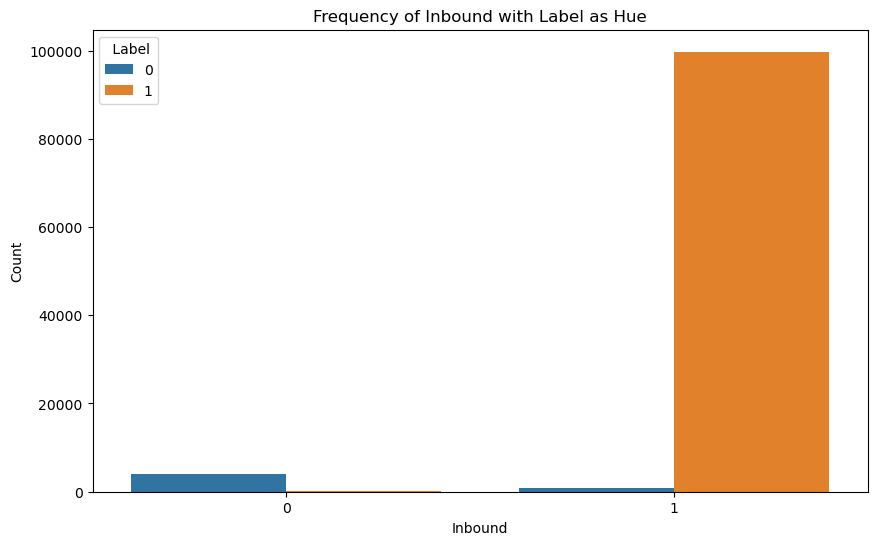

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_data, x=' Inbound', hue=' Label')
plt.title('Frequency of Inbound with Label as Hue')
plt.xlabel('Inbound')
plt.ylabel('Count')
plt.show()

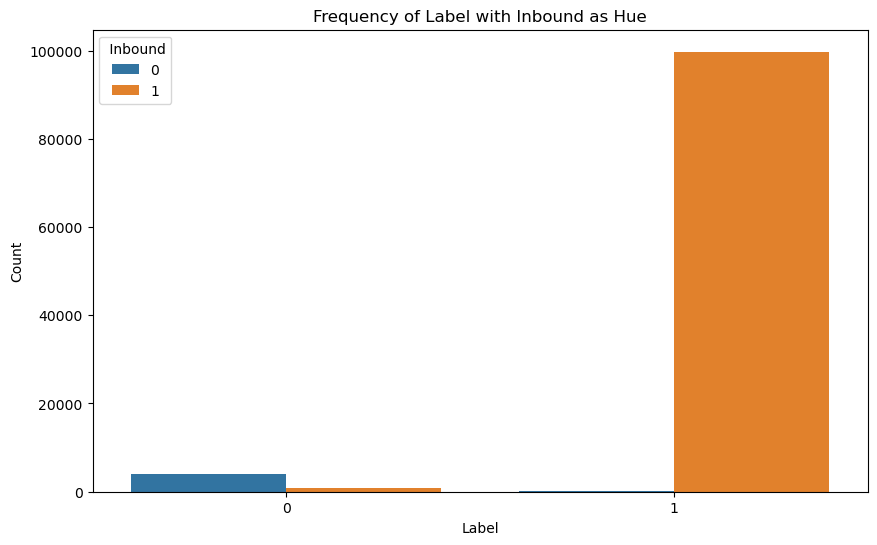

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_data, x=' Label', hue=' Inbound')
plt.title('Frequency of Label with Inbound as Hue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

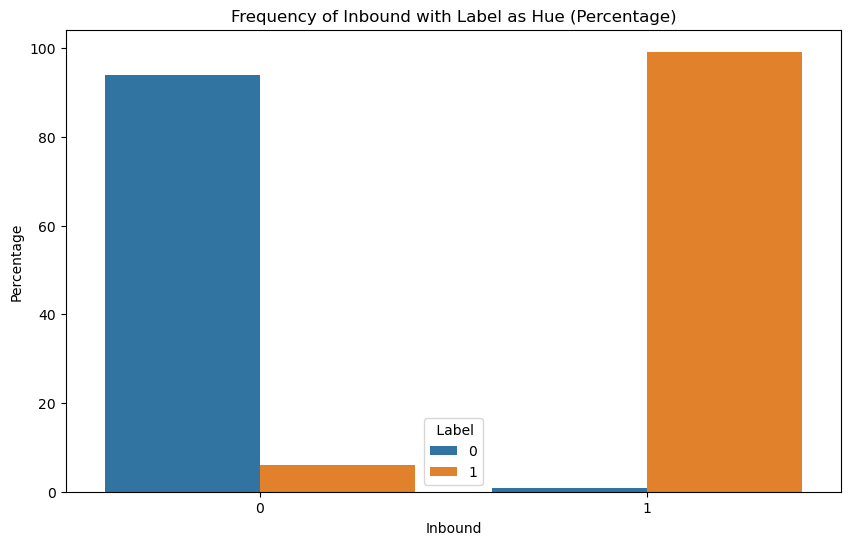

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Assuming your dataframe is named 'df'
inbound_label_counts = balanced_data.groupby([' Inbound', ' Label']).size().reset_index(name='Count')
total_counts = balanced_data.groupby([' Inbound']).size().reset_index(name='Total_Count')

inbound_label_counts = inbound_label_counts.merge(total_counts, on=' Inbound')
inbound_label_counts['Percentage'] = (inbound_label_counts['Count'] / inbound_label_counts['Total_Count']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=inbound_label_counts, x=' Inbound', y='Percentage', hue=' Label')
plt.title('Frequency of Inbound with Label as Hue (Percentage)')
plt.xlabel('Inbound')
plt.ylabel('Percentage')
plt.show()

In [12]:
inbound_label_counts

,Inbound,Label,Count,Total_Count,Percentage
0,0,0,3932,4185,93.954600
1,0,1,253,4185,6.045400
2,1,0,802,100549,0.797621
3,1,1,99747,100549,99.202379


In [13]:
# Split the data into train and test sets
X = balanced_data.drop([' Inbound',' Label'], axis=1)
y = balanced_data[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=42)

In [14]:
X_train.isnull().sum().sum()

1

In [15]:
import numpy as np

def check_data_issues(data):
    if data.isnull().values.any():
        print("There are NaN values in the dataset.")
    # Check for infinite values
    if np.isinf(data).values.any():
        print("There are infinite values in the dataset.")
    # Check for extremely large values
    max_value = data.max().max()
    if max_value > np.finfo(np.float64).max:
        print(f"There are values too large for dtype('float64') in the dataset. Max value: {max_value}")
    # Check for extremely small values
    min_value = data.min().min()
    if min_value < np.finfo(np.float64).min:
        print(f"There are values too small for dtype('float64') in the dataset. Min value: {min_value}")

In [16]:
# Check the training and testing data for any issues
check_data_issues(X_train)
check_data_issues(X_test)

There are NaN values in the dataset.
There are infinite values in the dataset.
There are values too large for dtype('float64') in the dataset. Max value: inf
There are infinite values in the dataset.
There are values too large for dtype('float64') in the dataset. Max value: inf


In [17]:
# Replace infinity values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [18]:
# Impute NaN values with the mean of the corresponding column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now, standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from joblib import dump

# Create an empty DataFrame with the desired columns
model_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score"])
saved_models = {}  # Dictionary to store saved models


# Train and evaluate machine learning models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the metrics to the DataFrame
    model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)

    # Save the trained model weight
    filename = f"{name}_model.joblib"
    dump(model, filename)
    saved_models[name] = filename  # Store the filename for later use in the tested DataSets

    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 score: {f1}")
    print(classification_report(y_test, y_pred))
    print(f"Model saved as: {filename}")
    print("\n")

/tmp/ipykernel_9049/2269720903.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Logistic Regression:
Accuracy: 0.9994907864167276
F1 score: 0.9994912977220073
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1420
           1       1.00      1.00      1.00     30001

    accuracy                           1.00     31421
   macro avg       1.00      1.00      1.00     31421
weighted avg       1.00      1.00      1.00     31421

Model saved as: Logistic Regression_model.joblib




/tmp/ipykernel_9049/2269720903.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Random Forest:
Accuracy: 0.9999681741510454
F1 score: 0.9999681794870047
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1420
           1       1.00      1.00      1.00     30001

    accuracy                           1.00     31421
   macro avg       1.00      1.00      1.00     31421
weighted avg       1.00      1.00      1.00     31421

Model saved as: Random Forest_model.joblib


Support Vector Machine:
Accuracy: 0.9994907864167276
F1 score: 0.9994921448743178
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1420
           1       1.00      1.00      1.00     30001

    accuracy                           1.00     31421
   macro avg       0.99      1.00      1.00     31421
weighted avg       1.00      1.00      1.00     31421

Model saved as: Support Vector Machine_model.joblib




/tmp/ipykernel_9049/2269720903.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


In [20]:
# Display the comparison DataFrame
model_comparison

,Model,Accuracy,F1 Score
0,Logistic Regression,0.999491,0.999491
1,Random Forest,0.999968,0.999968
2,Support Vector Machine,0.999491,0.999492


In [21]:
feature_columns = X.columns
feature_columns

Index([' Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length

In [22]:
# Get the Random Forest model from the 'models' dictionary
random_forest_model = models['Random Forest']

# Get feature importances
importances = random_forest_model.feature_importances_

# Create a DataFrame with the feature names and their corresponding importances
feature_importances = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances DataFrame
# Filter the DataFrame to show only features with non-zero importance
non_zero_importances = feature_importances[feature_importances['Importance'] > 0]

# Display the filtered DataFrame
non_zero_importances

,Feature,Importance
0,Source IP,1.293163e-01
58,Avg Fwd Segment Size,1.004364e-01
12,Fwd Packet Length Min,9.767047e-02
13,Fwd Packet Length Mean,6.612157e-02
45,Packet Length Mean,6.166106e-02
...,...,...
80,Idle Std,7.291251e-05
76,Active Std,6.341007e-05
18,Bwd Packet Length Std,4.671960e-05
50,RST Flag Count,3.501295e-05


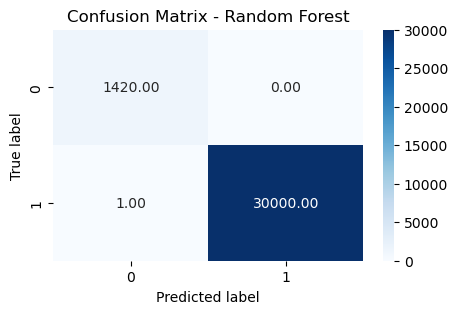

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Choose the model you want to use, for example, Random Forest
model = models["Random Forest"]
y_pred = model.predict(X_test)


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

/tmp/ipykernel_9049/4190811583.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)
/tmp/ipykernel_9049/4190811583.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Logistic Regression:
Accuracy: 0.9994907864167276
F1 score: 0.9994912977220073
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1420
           1       1.00      1.00      1.00     30001

    accuracy                           1.00     31421
   macro avg       1.00      1.00      1.00     31421
weighted avg       1.00      1.00      1.00     31421



Random Forest:
Accuracy: 0.9999681741510454
F1 score: 0.9999681794870047
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1420
           1       1.00      1.00      1.00     30001

    accuracy                           1.00     31421
   macro avg       1.00      1.00      1.00     31421
weighted avg       1.00      1.00      1.00     31421





/tmp/ipykernel_9049/4190811583.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Support Vector Machine:
Accuracy: 0.9994907864167276
F1 score: 0.9994921448743178
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1420
           1       1.00      1.00      1.00     30001

    accuracy                           1.00     31421
   macro avg       0.99      1.00      1.00     31421
weighted avg       1.00      1.00      1.00     31421





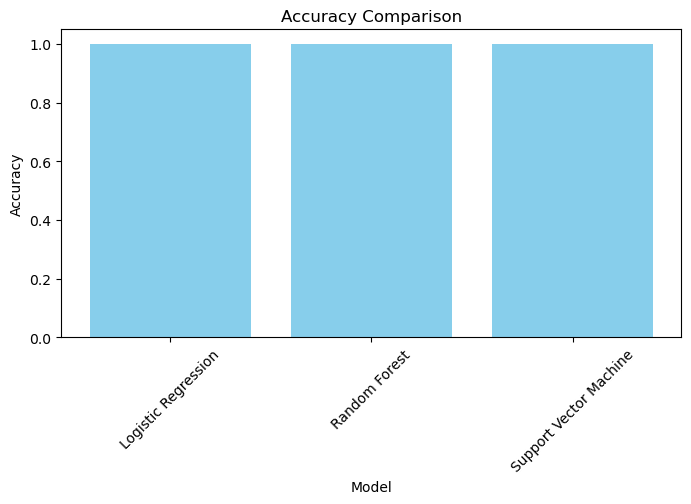

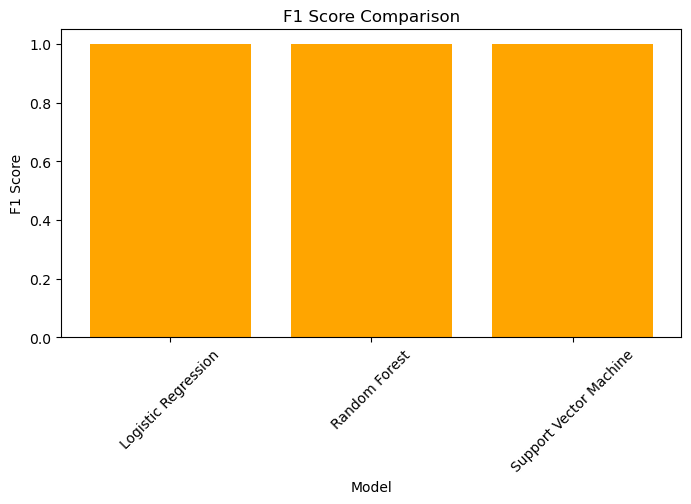

Model Comparison:
                    Model  Accuracy  F1 Score
0     Logistic Regression  0.999491  0.999491
1           Random Forest  0.999968  0.999968
2  Support Vector Machine  0.999491  0.999492


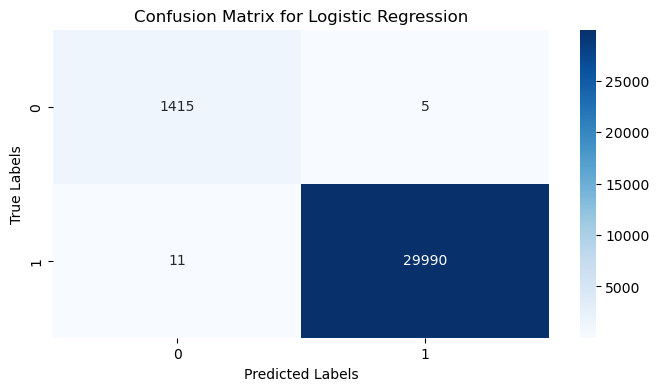

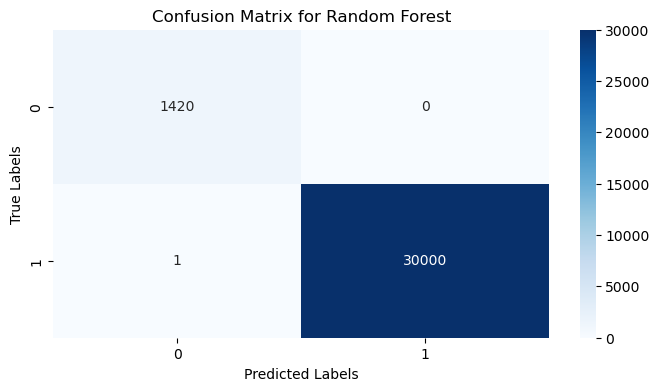

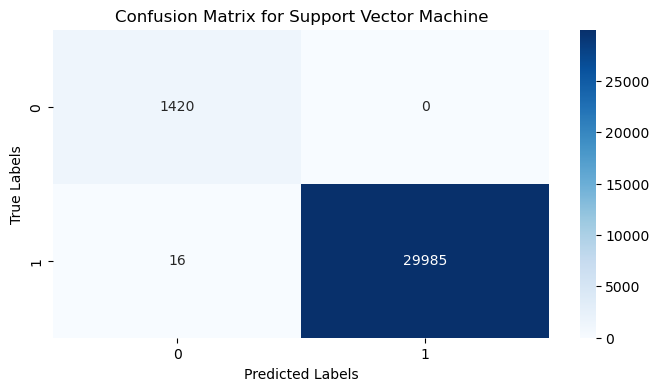

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Initialize the DataFrame to store model comparison
model_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score"])

# Initialize dictionary to store confusion matrices
confusion_matrices = {}

# Initialize lists to store accuracy and F1 score for each model
accuracy_scores = []
f1_scores = []

# Iterate over each loaded model
for name, model in models.items():
    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    # Append results to model comparison DataFrame
    model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)

    # Append accuracy and F1 score to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Print model evaluation metrics and confusion matrix
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 score: {f1}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

# Plotting accuracy scores
plt.figure(figsize=(8, 4))
plt.bar(model_comparison['Model'], accuracy_scores, color='skyblue')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Plotting F1 scores
plt.figure(figsize=(8, 4))
plt.bar(model_comparison['Model'], f1_scores, color='orange')
plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

# Displaying the model comparison DataFrame
print("Model Comparison:")
print(model_comparison)

# Plot confusion matrices for each model using Seaborn
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Loading Saved model weights

In [25]:
#Load the saved model
from joblib import load

# Load each model individually
# Give path of each model here
logistic_regression_model = load("Logistic Regression_model.joblib")
random_forest_model = load("Random Forest_model.joblib")
svm_model = load("Support Vector Machine_model.joblib")

# Store the loaded models in a dictionary
loaded_models = {
    "Logistic Regression": logistic_regression_model,
    "Random Forest": random_forest_model,
    "Support Vector Machine": svm_model
}

In [26]:
loaded_models.items()

dict_items([('Logistic Regression', LogisticRegression(max_iter=1000)), ('Random Forest', RandomForestClassifier()), ('Support Vector Machine', SVC())])

# Loading target dataset to test

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the new dataset we going to test the model on:
url = "https://ddosciu.s3.us-east-2.amazonaws.com/CSVs/UNB/UDPLag.csv"
new_data = pd.read_csv(url)

/tmp/ipykernel_9049/3739545448.py:8: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(url)


In [28]:
# Same Preprocessing for new dataset as i did with training dataset
# Drop irrelevant columns if necessary
try:
    new_data = new_data.drop(['Unnamed: 0', 'Flow ID', 'SimillarHTTP'], axis=1)
except KeyError:
    print('Columns are already dropped')

# Encode categorical features
encoder = LabelEncoder()
new_data[' Source IP'] = encoder.fit_transform(new_data[' Source IP'])
new_data[' Destination IP'] = encoder.fit_transform(new_data[' Destination IP'])
new_data[' Label'] = encoder.fit_transform(new_data[' Label'])

# Convert 'Timestamp' to datetime and then to int64
new_data[' Timestamp'] = pd.to_datetime(new_data[' Timestamp']).astype(np.int64)

# Preprocessing for feature columns used during training
X_new = new_data.drop([' Inbound', ' Label'], axis=1)  # Assuming 'Inbound' and 'Label' are not present in the new dataset
X_new.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_new = imputer.fit_transform(X_new)
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

#Labels for comparison (They are not always available for some datasets)
y_new = new_data[' Label']

In [29]:
# Now, i can use the loaded models to make predictions on the preprocessed new dataset
predictions = {}
for name, model in loaded_models.items():
    predictions[name] = model.predict(X_new)

# Print predictions for each model
for name, preds in predictions.items():
    print(f"Predictions using {name}: {preds}")

Predictions using Logistic Regression: [1 1 1 ... 1 1 1]
Predictions using Random Forest: [1 1 1 ... 1 1 1]
Predictions using Support Vector Machine: [1 1 1 ... 1 1 1]


# Evaluation

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Initialize the DataFrame to store model comparison
model_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score"])

# Initialize dictionary to store confusion matrices
confusion_matrices = {}

# Initialize lists to store accuracy and F1 score for each model
accuracy_scores = []
f1_scores = []

# Iterate over each loaded model
for name, model in loaded_models.items():
    # Make predictions on test data
    y_pred = model.predict(X_new)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_new, y_pred)
    f1 = f1_score(y_new, y_pred, average='weighted')

    # Calculate confusion matrix
    cm = confusion_matrix(y_new, y_pred)
    confusion_matrices[name] = cm

    # Append results to model comparison DataFrame
    model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)

    # Append accuracy and F1 score to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Print model evaluation metrics and confusion matrix
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 score: {f1}")
    print("Classification Report:")
    print(classification_report(y_new, y_pred))
    print("\n")

/tmp/ipykernel_9049/3607028864.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Logistic Regression:
Accuracy: 0.8358359821557853
F1 score: 0.7649307522425635
Classification Report:


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

              precision    recall  f1-score   support

           0       0.46      0.92      0.61      4068
           1       0.84      0.99      0.91    606749
           2       0.00      0.00      0.00    112475
           3       0.00      0.00      0.00      1873

    accuracy                           0.84    725165
   macro avg       0.32      0.48      0.38    725165
weighted avg       0.71      0.84      0.76    725165





/tmp/ipykernel_9049/3607028864.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Random Forest:
Accuracy: 0.7518013141836686
F1 score: 0.7181028284839125
Classification Report:


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

              precision    recall  f1-score   support

           0       0.05      0.80      0.09      4068
           1       0.82      0.89      0.86    606749
           2       0.00      0.00      0.00    112475
           3       0.00      0.00      0.00      1873

    accuracy                           0.75    725165
   macro avg       0.22      0.42      0.24    725165
weighted avg       0.69      0.75      0.72    725165





/tmp/ipykernel_9049/3607028864.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Support Vector Machine:
Accuracy: 0.7738873221956383
F1 score: 0.7342518824601263
Classification Report:


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.07      1.00      0.13      4068
           1       0.84      0.92      0.88    606749
           2       0.00      0.00      0.00    112475
           3       0.00      0.00      0.00      1873

    accuracy                           0.77    725165
   macro avg       0.23      0.48      0.25    725165
weighted avg       0.70      0.77      0.73    725165





/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


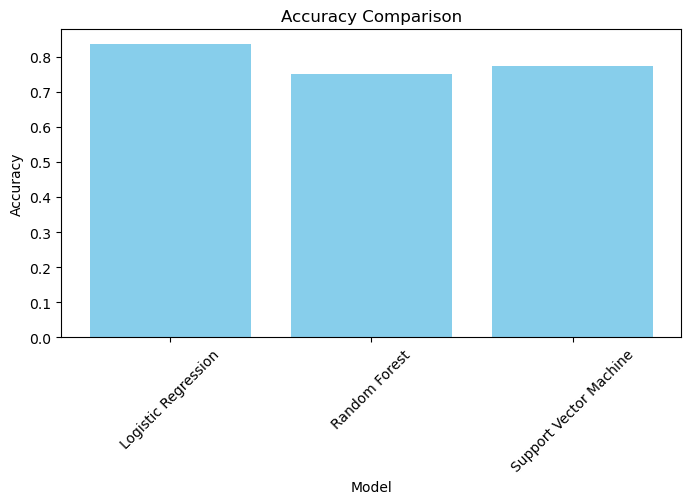

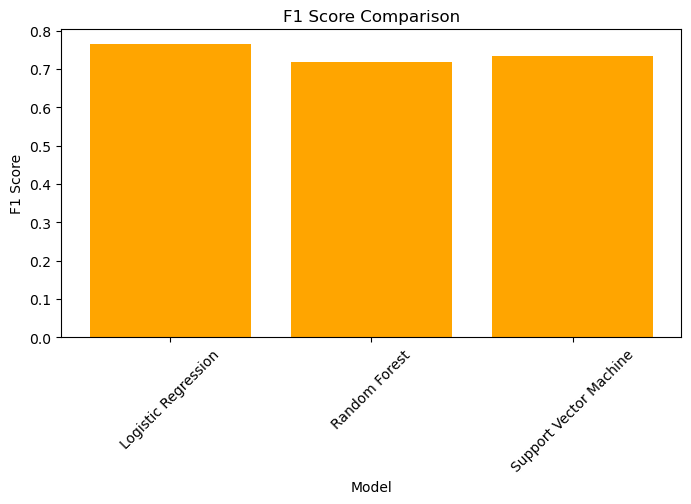

Model Comparison:
                    Model  Accuracy  F1 Score
0     Logistic Regression  0.835836  0.764931
1           Random Forest  0.751801  0.718103
2  Support Vector Machine  0.773887  0.734252


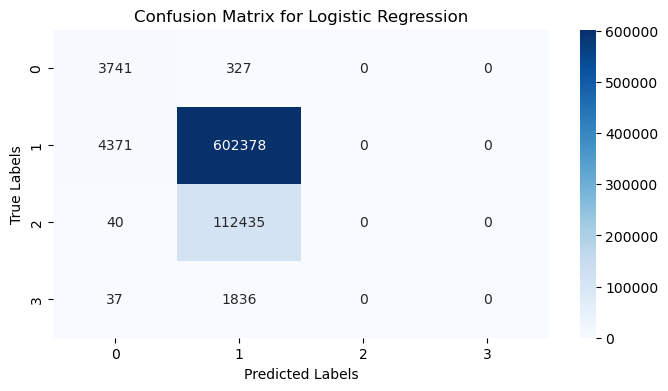

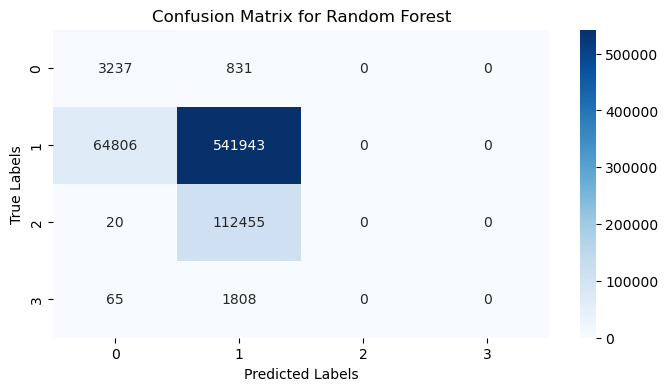

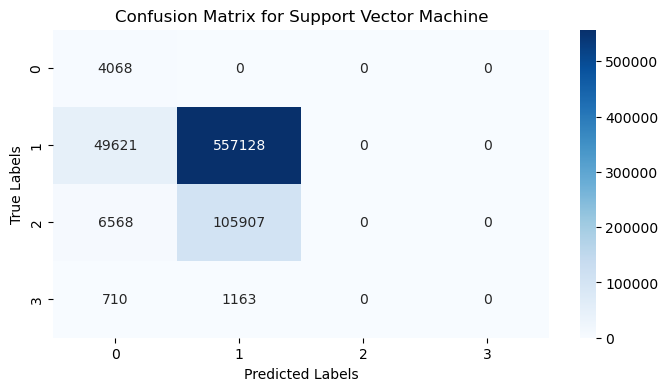

In [31]:
# Plotting accuracy scores
plt.figure(figsize=(8, 4))
plt.bar(model_comparison['Model'], accuracy_scores, color='skyblue')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Plotting F1 scores
plt.figure(figsize=(8, 4))
plt.bar(model_comparison['Model'], f1_scores, color='orange')
plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

# Displaying the model comparison DataFrame
print("Model Comparison:")
print(model_comparison)

# Plot confusion matrices for each model using Seaborn
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()